## Week 4 Individual Assignment

In this assignment, I will compare the walking isochrones of the neighborhoods I identified as transit friendly in the Week 3 group assignment. For that assignment, I found that Downtown LA, Panorama City, and Harbor Gateway are three of the neighborhoods with the highest percentage of transit riders to work (see image below). With that in mind, I'd like to get a sense of the walksheds that residents of these neighborhoods experience. To do so, I'll follow a similar procedure as we did in the in-class lab, but I'll look at these three specific neighborhoods. This is also helpful because parts of the lab went over my head, so it gives me a chance to go through it again at my own pace.

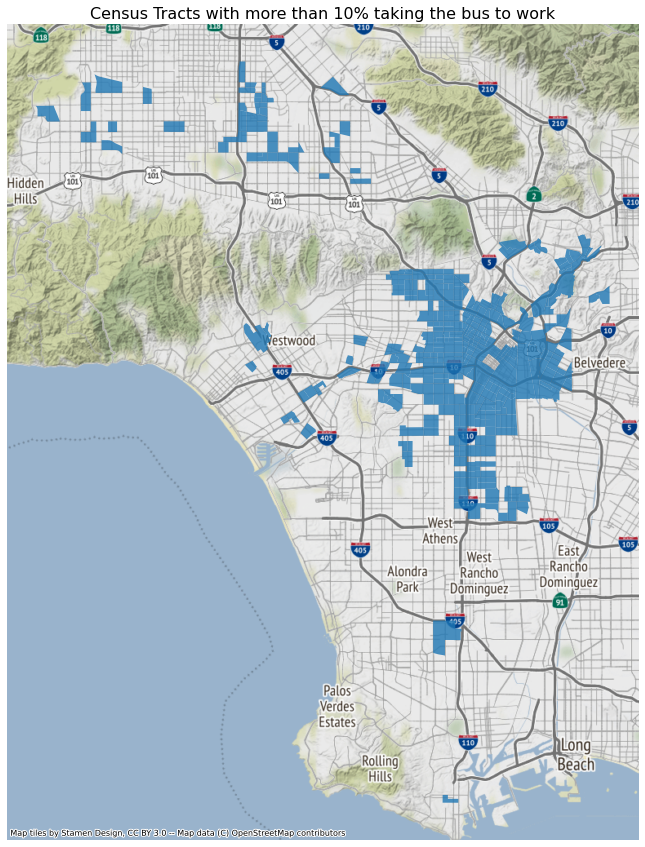

### Import the libraries
Below, I'll import the geopandas, matplotlib.pyplot, networkx, open street maps, and contextily libraries.

In [144]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx

### Download and prep the street network
In the cells below, I'll download boundaries for the three neighborhoods in question, plot them to confirm their accuracy, and project the data to Web Mercator. 

In [145]:
place1 = 'Panorama City, Los Angeles, CA, USA'
place2 = 'Downtown, Los Angeles, CA, USA'
place3 = 'Harbor Gateway, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20]
meters_per_minute = 60

In [146]:
G1 = ox.graph_from_place(place1, network_type=network_type)
G2 = ox.graph_from_place(place2, network_type=network_type)
G3 = ox.graph_from_place(place3, network_type=network_type)

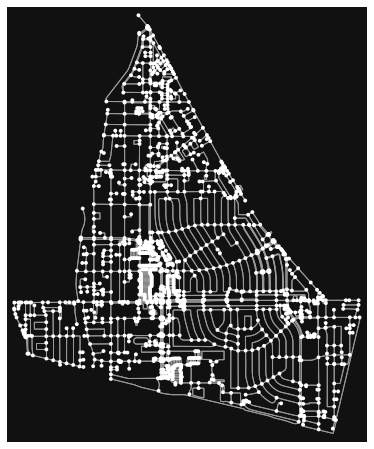

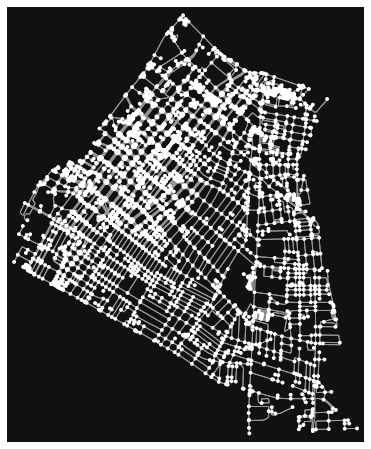

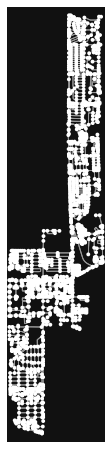

In [147]:
fig1, ax = ox.plot_graph(G1)
fig2, ax = ox.plot_graph(G2)
fig3, ax = ox.plot_graph(G3)

In [148]:
G1 = ox.project_graph(G1, to_crs='epsg:3857')
G2 = ox.project_graph(G2, to_crs='epsg:3857')
G3 = ox.project_graph(G3, to_crs='epsg:3857')

### Create edge and node geodataframes

In the section below, I'll create geodataframes for both the edges and the nodes of each of the three neighborhoods, and I'll check those geodataframes by plotting and looking at the head of one of each type of geodataframe. 

In [149]:
gdf_nodes1, gdf_edges1 = ox.graph_to_gdfs(G1)
gdf_nodes2, gdf_edges2 = ox.graph_to_gdfs(G2)
gdf_nodes3, gdf_edges3 = ox.graph_to_gdfs(G3)

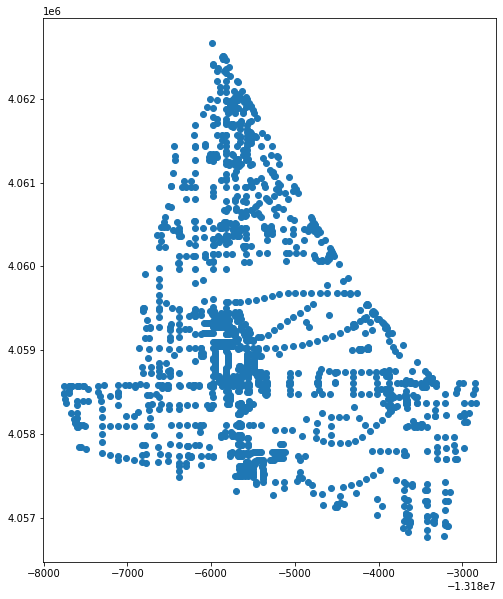

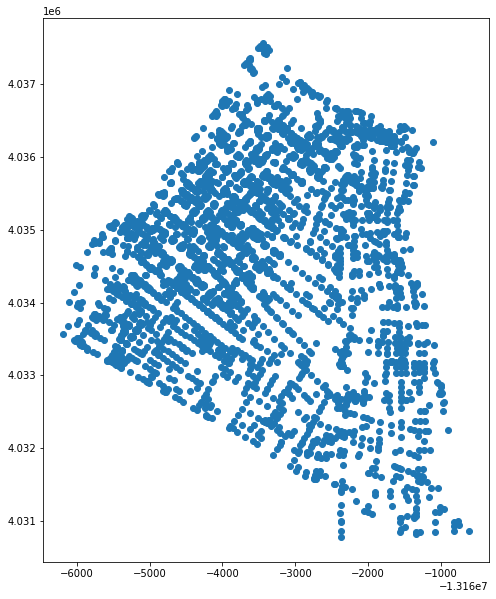

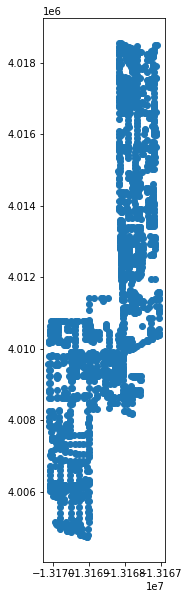

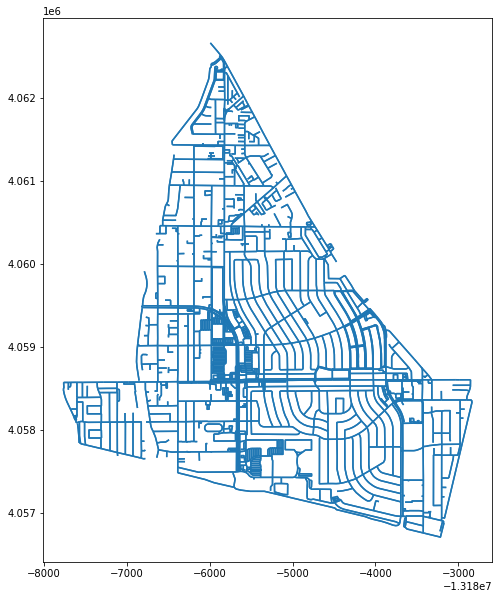

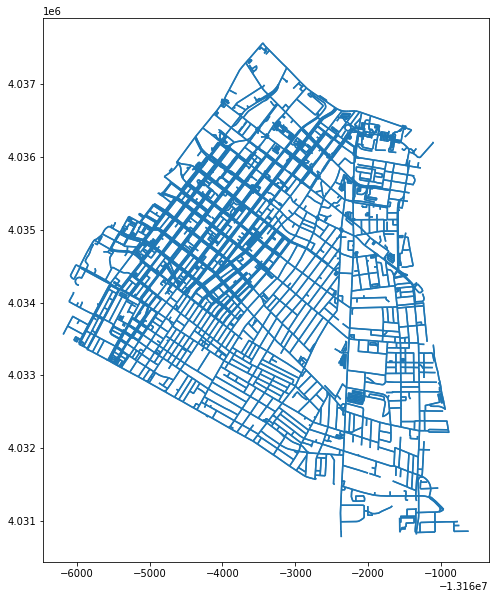

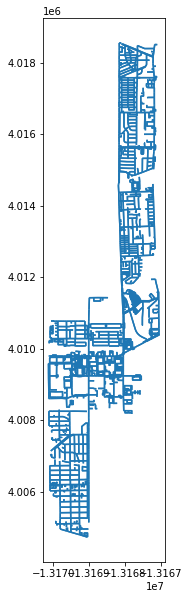

In [150]:
gdf_nodes1.plot(figsize = (10,10))
gdf_nodes2.plot(figsize = (10,10))
gdf_nodes3.plot(figsize = (10,10))
gdf_edges1.plot(figsize = (10,10))
gdf_edges2.plot(figsize = (10,10))
gdf_edges3.plot(figsize = (10,10))

In [151]:
gdf_nodes1.head()

,y,x,osmid,lon,lat,highway,geometry
35498908,4.060462e+06,-1.318638e+07,35498908,-118.455305,34.235456,NaN,POINT (-13186384.201 4060461.976)
122562740,4.058360e+06,-1.318671e+07,122562740,-118.458222,34.219844,turning_circle,POINT (-13186708.987 4058360.056)
122562742,4.058344e+06,-1.318675e+07,122562742,-118.458609,34.219723,NaN,POINT (-13186751.989 4058343.807)
122562757,4.058351e+06,-1.318550e+07,122562757,-118.447364,34.219779,NaN,POINT (-13185500.213 4058351.346)
122562762,4.058348e+06,-1.318619e+07,122562762,-118.453556,34.219751,NaN,POINT (-13186189.503 4058347.563)


In [152]:
gdf_edges1.head()

,osmid,oneway,name,highway,maxspeed,length,geometry,lanes,service,bridge,access,width,tunnel,u,v,key
0,405341710,False,Nordhoff Street,primary,35 mph,116.680,"LINESTRING (-13186384.201 4060461.976, -131865...",NaN,NaN,NaN,NaN,NaN,NaN,35498908,5574950690,0
1,32905834,False,Willis Avenue,residential,NaN,34.482,"LINESTRING (-13186384.201 4060461.976, -131863...",NaN,NaN,NaN,NaN,NaN,NaN,35498908,4185711040,0
2,"[405341707, 405341710]",False,Nordhoff Street,primary,35 mph,162.585,"LINESTRING (-13186384.201 4060461.976, -131862...",NaN,NaN,NaN,NaN,NaN,NaN,35498908,1877012422,0
3,13279265,False,Titus Street,residential,NaN,37.970,"LINESTRING (-13186708.987 4058360.056, -131867...",NaN,NaN,NaN,NaN,NaN,NaN,122562740,122562742,0
4,13279265,False,Titus Street,residential,NaN,37.970,"LINESTRING (-13186751.989 4058343.807, -131867...",NaN,NaN,NaN,NaN,NaN,NaN,122562742,122562740,0


### Centroid and Nearest Nodes

Next, I'll get the centroid and node nearest to the centroid for each of the three neighborhoods.

In [153]:
minx1, miny1,maxx1, maxy1 = gdf_nodes1.geometry.total_bounds
minx2, miny2,maxx2, maxy2 = gdf_nodes2.geometry.total_bounds
minx3, miny3,maxx3, maxy3 = gdf_nodes3.geometry.total_bounds

centroid_x1 = (maxx1-minx1)/2 + minx1
centroid_y1 = (maxy1-miny1)/2 + miny1
centroid_x2 = (maxx2-minx2)/2 + minx2
centroid_y2 = (maxy2-miny2)/2 + miny2
centroid_x3 = (maxx3-minx3)/2 + minx3
centroid_y3 = (maxy3-miny3)/2 + miny3

centroid1 = ox.get_nearest_node(G1,(centroid_y1,centroid_x1),method = 'euclidean')
centroid2 = ox.get_nearest_node(G2,(centroid_y2,centroid_x2),method = 'euclidean')
centroid3 = ox.get_nearest_node(G3,(centroid_y3,centroid_x3),method = 'euclidean')

### Isochrones

Now it's time to create the isochrones. In this section, we'll calculate the time it takes to travel each edge, color code each trip time walkshed, create polygons for each area, and dissolve each node into four total rows. This section is where I started to get lost in lab. 

In [154]:
gdf_edges1['walk_time'] = gdf_edges1['length']/meters_per_minute
gdf_edges2['walk_time'] = gdf_edges2['length']/meters_per_minute
gdf_edges3['walk_time'] = gdf_edges3['length']/meters_per_minute

We defined meters_per_minute at the top of the code, so this just adds a walk time column for each "edges" geodataframe based on the length of each individual segment and the predefined walk speed.

In [165]:
iso_colors = ox.plot.get_colors(n=len(trip_times),
                               cmap='summer',
                               start=0,
                               return_hex=True)

This uses the preprogrammed "summer" color spectrum to assign a different color to each walkshed (5 minute, 10 minute, 15 minute, and 20 minute), as defined at the top of the code in "trip_times". 

In [166]:
trip_times.sort(reverse=True)

I forgot this step at first, so my maps showed only "20 minutes" and "NA". I added this in so all four walksheds would be defined.

In [167]:
time_color = list(zip(trip_times,iso_colors))

This creates a list of four pairs, each one with a time and its matching color. I think I remember from class that we're doing this so the variable works in the for loops below.

In [168]:
for time, color in list(time_color):
    subgraph = nx.ego_graph(G1, centroid1,radius=time, distance='time')
    for node in subgraph.nodes():
        gdf_nodes1.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes1.loc[node,'color'] = color

In [169]:
for time, color in list(time_color):
    subgraph = nx.ego_graph(G2, centroid2,radius=time, distance='time')
    for node in subgraph.nodes():
        gdf_nodes2.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes2.loc[node,'color'] = color

In [170]:
for time, color in list(time_color):
    subgraph = nx.ego_graph(G3, centroid3,radius=time, distance='time')
    for node in subgraph.nodes():
        gdf_nodes3.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes3.loc[node,'color'] = color

The three for loops above color each individual node with its designated color based upon the time it takes to walk to it. It leaves the nodes that can't be reached within 20 minutes as "NA", so we replace those nodes with the #cccccc color below.

In [171]:
gdf_nodes1['color'].fillna('#cccccc',inplace=True)
gdf_nodes2['color'].fillna('#cccccc',inplace=True)
gdf_nodes3['color'].fillna('#cccccc',inplace=True)

In [172]:
gdf_nodes3.sample(10)

,y,x,osmid,highway,lon,lat,geometry,time,color
4818828133,4.009240e+06,-1.316914e+07,4818828133,NaN,-118.300438,33.854188,POINT (-13169144.474 4009239.774),NaN,#cccccc
6759550391,4.016823e+06,-1.316739e+07,6759550391,NaN,-118.284638,33.910744,POINT (-13167385.626 4016823.454),NaN,#cccccc
6765746759,4.008730e+06,-1.316764e+07,6765746759,NaN,-118.286879,33.850388,POINT (-13167635.138 4008730.478),NaN,#cccccc
122868491,4.016611e+06,-1.316802e+07,122868491,NaN,-118.290363,33.909158,POINT (-13168022.930 4016610.678),NaN,#cccccc
4876275856,4.012095e+06,-1.316801e+07,4876275856,NaN,-118.290234,33.875484,POINT (-13168008.670 4012094.852),NaN,#cccccc
123182178,4.010476e+06,-1.316882e+07,123182178,turning_circle,-118.297503,33.863410,POINT (-13168817.763 4010476.093),20 mins,#008066
7669498963,4.010224e+06,-1.316982e+07,7669498963,NaN,-118.306472,33.861527,POINT (-13169816.187 4010223.579),NaN,#cccccc
4621245700,4.016906e+06,-1.316717e+07,4621245700,NaN,-118.282731,33.911362,POINT (-13167173.440 4016906.255),NaN,#cccccc
7663484390,4.010092e+06,-1.316797e+07,7663484390,NaN,-118.289863,33.860544,POINT (-13167967.326 4010091.775),NaN,#cccccc
122731697,4.006684e+06,-1.316905e+07,122731697,NaN,-118.299556,33.835121,POINT (-13169046.335 4006684.300),NaN,#cccccc


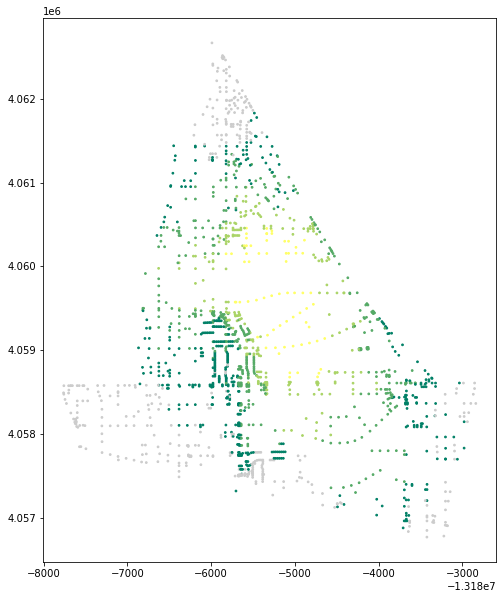

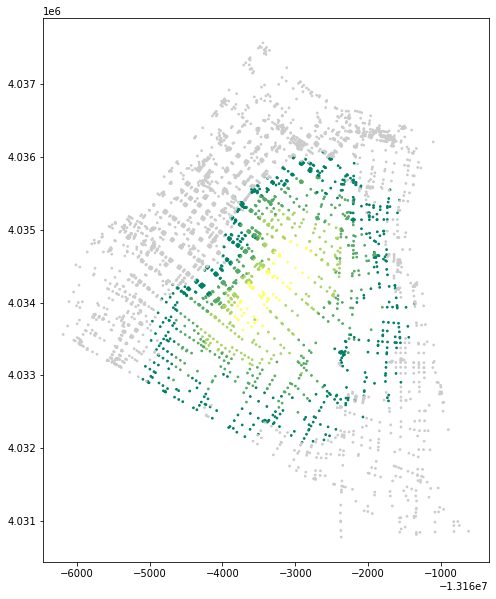

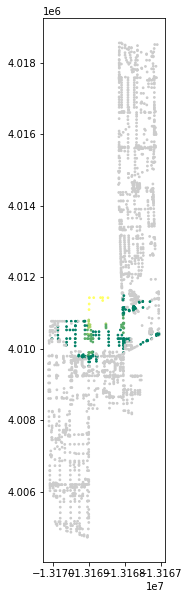

In [173]:
gdf_nodes1.plot(figsize=(10,10),
               color=gdf_nodes1['color'],
               markersize=3)
gdf_nodes2.plot(figsize=(10,10),
               color=gdf_nodes2['color'],
               markersize=3)
gdf_nodes3.plot(figsize=(10,10),
               color=gdf_nodes3['color'],
               markersize=3)

These maps look pretty good. Harbor Gateway looks a little funky based on its unique dimensions (more on that below), but everything else looks correct here.

In [193]:
isochrones1 = gdf_nodes1.dissolve("time")
isochrones1 = isochrones1.convex_hull.reset_index()
isochrones1.columns=['time','geometry']
isochrones1.head()

,time,geometry
0,10 mins,"POLYGON ((-13184752.224 4057943.601, -13184909..."
1,15 mins,"POLYGON ((-13184276.411 4057298.265, -13184569..."
2,20 mins,"POLYGON ((-13183707.702 4056875.724, -13185704..."
3,5 mins,"POLYGON ((-13185062.649 4058676.146, -13185345..."


In [194]:
isochrones2 = gdf_nodes2.dissolve("time")
isochrones2 = isochrones2.convex_hull.reset_index()
isochrones2.columns=['time','geometry']
isochrones2.head()

,time,geometry
0,10 mins,"POLYGON ((-13162914.245 4033031.511, -13163589..."
1,15 mins,"POLYGON ((-13162964.161 4032494.289, -13163671..."
2,20 mins,"POLYGON ((-13162908.278 4032081.991, -13163692..."
3,5 mins,"POLYGON ((-13163719.330 4033625.110, -13163878..."


In [195]:
isochrones3 = gdf_nodes3.dissolve("time")
isochrones3 = isochrones3.convex_hull.reset_index()
isochrones3.columns=['time','geometry']
isochrones3.head()

,time,geometry
0,10 mins,"POLYGON ((-13169011.982 4010407.132, -13169012..."
1,15 mins,"POLYGON ((-13169011.614 4009793.008, -13169028..."
2,20 mins,"POLYGON ((-13169011.314 4009517.199, -13170035..."
3,5 mins,"POLYGON ((-13169000.961 4011097.319, -13168996..."


In the code above, I create polygons for each time area using the "dissolve" command. As shown in the .head() command, this results in each isochrone geodataframe condensing into four rows: one for each walkshed time. The convex hull command makes an outline around the shape using only the nodes that extend furthest out. Then, I believe for ease of plotting, we rename what was previously the "0" column to "geometry". 

### Create the Final Maps

Now that I've create the isochrones, I plot them, the neighborhood centroids, and the geodataframes of nodes I created earlier.

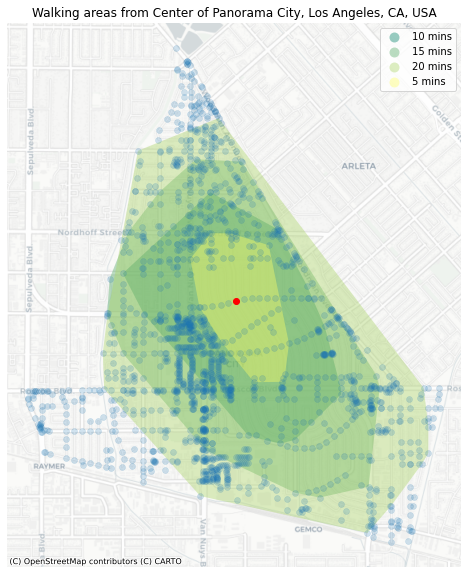

In [199]:
fig, ax = plt.subplots(figsize=(10,10))
isochrones1.plot(alpha=0.4,
                ax=ax,
                column='time',
                cmap='summer',
                legend=True,
                zorder=10)
gdf_nodes1.loc[[centroid1]].plot(ax=ax,color='r', zorder=30)
gdf_nodes1.plot(ax=ax,linewidth=0.5,alpha=0.2,zorder=10)
ax.axis('off')
ax.set_title('Walking areas from Center of ' + place1)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

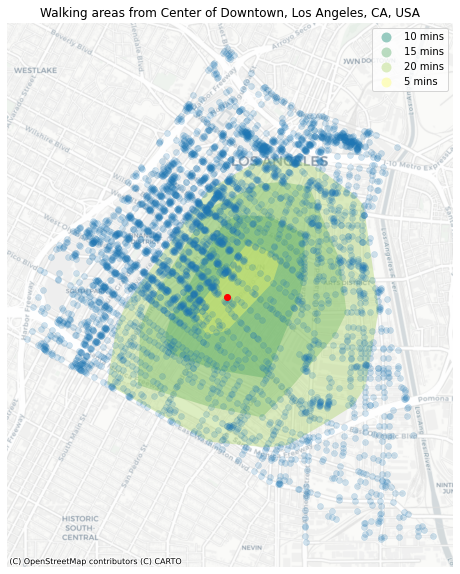

In [200]:
fig, ax = plt.subplots(figsize=(10,10))
isochrones2.plot(alpha=0.4,
                ax=ax,
                column='time',
                cmap='summer',
                legend=True,
                zorder=10)
gdf_nodes2.loc[[centroid2]].plot(ax=ax,color='r', zorder=30)
gdf_nodes2.plot(ax=ax,linewidth=0.5,alpha=0.2,zorder=10)
ax.axis('off')
ax.set_title('Walking areas from Center of ' + place2)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

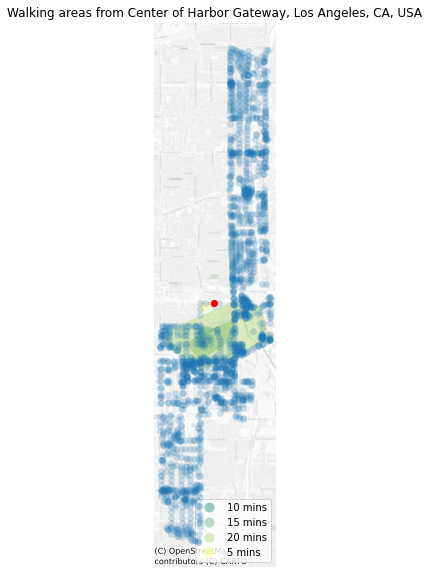

In [201]:
fig, ax = plt.subplots(figsize=(10,10))
isochrones3.plot(alpha=0.4,
                ax=ax,
                column='time',
                cmap='summer',
                legend=True,
                zorder=10)
gdf_nodes3.loc[[centroid3]].plot(ax=ax,color='r', zorder=30)
gdf_nodes3.plot(ax=ax,linewidth=0.5,alpha=0.2,zorder=10)
ax.axis('off')
ax.set_title('Walking areas from Center of ' + place3)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

These look pretty good! To some extent, each of the isochrones shown are limited by the boundaries of the neighborhood. This is especially true for the Harbor Gateway neighborhood. It's walkshed is pretty severely limited by its shape. However, looking through these results, it's apparent that downtown has the greatest density of nodes that is easily accessible by walking. It doesn't look like Panorama City has a great density of nodes accessible by walking, which could mean it may not be as accessible of a neighborhood on foot.